# 2017-2018 Deployment

## DAFT 1

In [2]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import numpy as np

Deployment Direction: 335.66264562104107


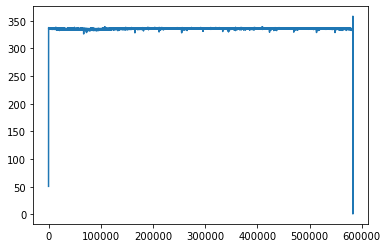

In [3]:
dataDir = '../data/2018/DAFT1/Compass/'
files = glob(dataDir+'PMEL/SERIAL/*.txt')
dir = []
temp = []
time = []
for file in files:
    try:
        dfCompass=pd.read_csv(file, header = None)
        for dat in dfCompass[1]:
            dir.append(float(dat.split('P')[0][2:]))
            temp.append(float(dat.split('-')[-1][:-3]))
        for t in dfCompass[0]:
            time.append(t)
    except:
        continue
plt.plot(dir)
print('Deployment Direction: '+ str(np.mean(dir[1000:-1000])))

Deployment Direction: 11.622402183411895


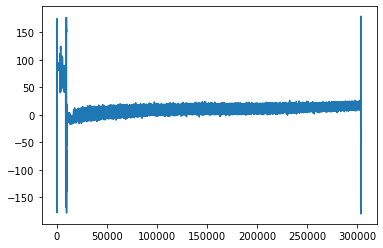

In [37]:
dataDir = '../data/2018/DAFT1/Compass/'
files = glob(dataDir+'OpenTag/*.csv')
dir = []
temp = []
time = []
for file in files[3:]:
    try:
        dfCompass=pd.read_csv(file)
        dir.append(dfCompass.yaw.values)
        temp.append(dfCompass.temperature.values)
    except:
        continue
dir = [item for sublist in dir for item in sublist]
plt.plot(dir)
print('Deployment Direction: '+ str(np.mean(dir[1000:-1000])))

In [35]:
hold = pd.DataFrame({'time':pd.to_datetime(time), 'heading':dir[:len(pd.to_datetime(time))]})
time_offset = pd.to_datetime('2017-08-06 17:00:00') - hold.time[0] #when the battery was turned on for Daft 1
hold.time = hold.time+time_offset # add that time delta to fix all of the times for the whole series
#hold.set_index('time').to_csv('D:/AIESII/Mooring/Data/DAFT1/PMELCompass/CompassDAFT1.csv') export as 1 csv

(-2, 6)

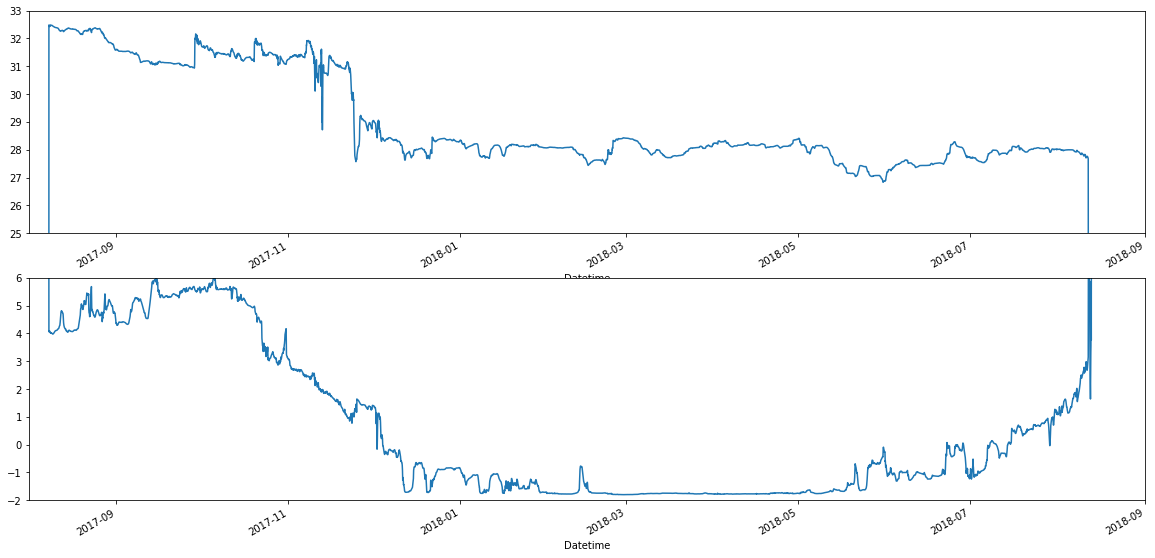

In [171]:
file = glob(dataDir+'/SBE37/DAFT*SN*.asc')
df=pd.read_table(file[0],skiprows=51,sep=',',names=['Temp','Con','Sal','Date','Time'])
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('Datetime')
df = df.drop(['Date','Time','Con'], axis=1)

f, [ax1,ax2] = plt.subplots(2,1,figsize=(20,10))
ax1=plt.subplot(211)
df.Sal.plot(axes=ax1)
ax1.set_xlim([pd.to_datetime('08-01-2017'),pd.to_datetime('09-01-2018')])
ax1.set_ylim([25,33])

ax2=plt.subplot(212)
df.Temp.plot(axes=ax2)
ax2.set_xlim([pd.to_datetime('08-01-2017'),pd.to_datetime('09-01-2018')])
ax2.set_ylim([-2,6])

## DAFT 2

Deployment Direction: 208.92292267543593


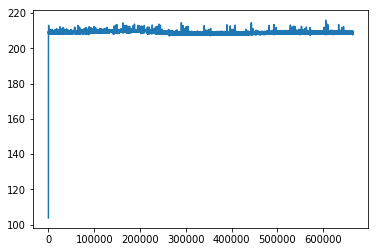

In [25]:
dataDir = 'D:/AIESII/Mooring/Data/DAFT2/'
files = glob(dataDir+'PMELCompass/SERIAL/*.txt')
dir = []
temp = []
time = []
for file in files:
    try:
        dfCompass=pd.read_csv(file, header = None)
        for dat in dfCompass[1]:
            dir.append(float(dat.split('P')[0][2:]))
            temp.append(float(dat.split('-')[-1][:-3]))
        for t in dfCompass[0]:
            time.append(t)
    except:
        continue
plt.plot(dir)
print('Deployment Direction: '+ str(np.mean(dir[1000:-1000])))

In [33]:
hold = pd.DataFrame({'time':pd.to_datetime(time), 'heading':dir[:len(pd.to_datetime(time))]})
time_offset = pd.to_datetime('2017-08-08 06:42:00') - hold.time[0] #when the battery was turned on for Daft 1
hold.time = hold.time+time_offset # add that time delta to fix all of the times for the whole series
#hold.set_index('time').to_csv('D:/AIESII/Mooring/Data/DAFT2/PMELCompass/CompassDAFT2.csv') #export as one csv file

In [ ]:
file = glob(dataDir+'/SBE37/DAFT*SN*.asc')
print(file)
df=pd.read_table(file[0],skiprows=51,sep=',',names=['Temp','Con','Sal','Date','Time'])
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('Datetime')
df = df.drop(['Date','Time','Con'], axis=1)

f, [ax1,ax2] = plt.subplots(2,1,figsize=(20,10))
ax1=plt.subplot(211)
df.Sal.plot(axes=ax1)
ax1.set_xlim([pd.to_datetime('08-01-2017'),pd.to_datetime('09-01-2018')])
ax1.set_ylim([25,33])

ax2=plt.subplot(212)
df.Temp.plot(axes=ax2)
ax2.set_xlim([pd.to_datetime('08-01-2017'),pd.to_datetime('09-01-2018')])
ax2.set_ylim([-2,6])

# 2018-2019 Deployment

['C:/OS201901/DAFT/Recovery/DAFT1\\SBE37_DAFT1_C11_Recovery2019.csv', 'C:/OS201901/DAFT/Recovery/DAFT2\\SBE37_DAFT2_C1_Recovery2019.csv', 'C:/OS201901/DAFT/Recovery/DAFT3\\SBE37_DAFT3_C4_Recovery2019.csv']


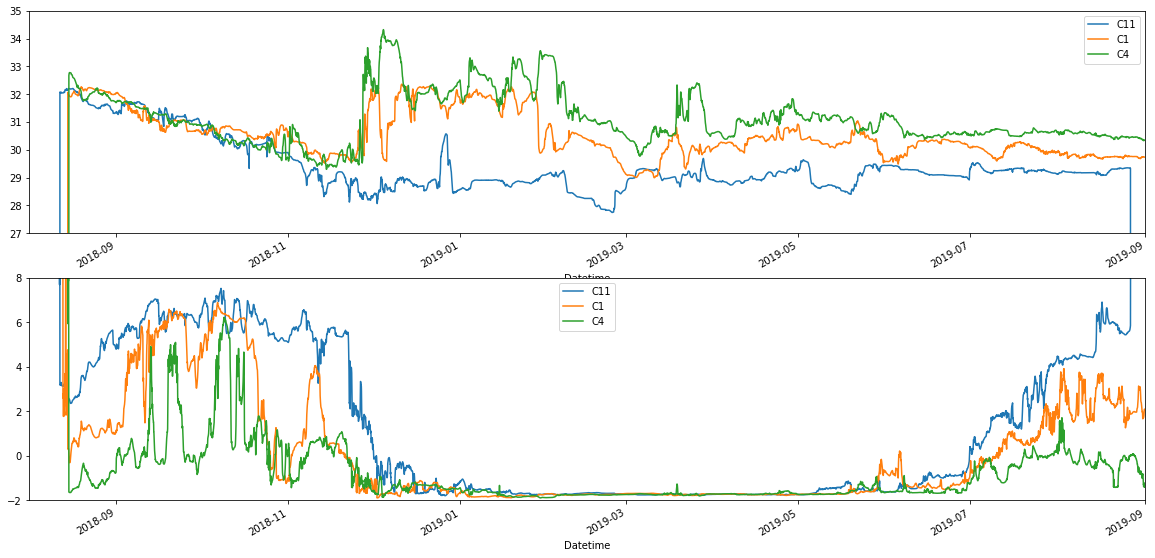

In [75]:
dataDir = 'C:/OS201901/DAFT/Recovery'
d1 = glob(dataDir+'/DAFT1/*.csv')[0]
d2 = glob(dataDir+'/DAFT2/*.csv')[0]
d3 = glob(dataDir+'/DAFT3/*.csv')[0]
print([d1,d2,d3])

def readSBE(file):
    df = pd.read_csv(file)
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df = df.drop(['Date','Time'], axis=1)
    df = df.set_index('Datetime')
    return df
dfD1 = readSBE(d1)
dfD2 = readSBE(d2)
dfD3 = readSBE(d3)

f, [ax1,ax2] = plt.subplots(2,1,figsize=(20,10))
ax1=plt.subplot(211)
dfD1.Sal.plot(axes=ax1)
dfD2.Sal.plot(axes=ax1)
dfD3.Sal.plot(axes=ax1)
ax1.set_xlim([pd.to_datetime('08-01-2018'),pd.to_datetime('09-01-2019')])
ax1.set_ylim([27,35])
plt.legend(['C11', 'C1','C4'])

ax2=plt.subplot(212)
dfD1.Temp.plot(axes=ax2)
dfD2.Temp.plot(axes=ax2)
dfD3.Temp.plot(axes=ax2)
ax2.set_xlim([pd.to_datetime('08-01-2018'),pd.to_datetime('09-01-2019')])
ax2.set_ylim([-2,8])
plt.legend(['C11', 'C1','C4'])

# Combine 2 years of CTD

In [2]:
def readSBE(file,mooring):
    df = pd.read_csv(file)
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df = df.drop(['Date','Time'], axis=1)
    df = df.set_index('Datetime')
    df.index = df.index.round('H')
    df = df.rename(columns={'Temp':'Temp_'+str(mooring),'Sal':'Sal_'+str(mooring)})
    return df

dfD1Y1 = readSBE(glob('../data/2018/DAFT1/SBE37/*.csv')[0],1)
dfD2Y1 = readSBE(glob('../data/2018/DAFT2/SBE37/*.csv')[0],2)
dfD3Y1 = readSBE(glob('../data/2018/DAFT3/SBE37/*.csv')[0],3)
dfD1Y2 = readSBE(glob('../data/2019/DAFT1/SBE37/*.csv')[0],1)
dfD2Y2 = readSBE(glob('../data/2019/DAFT2/SBE37/*.csv')[0],2)
dfD3Y2 = readSBE(glob('../data/2019/DAFT3/SBE37/*.csv')[0],3)
y1 = dfD1Y1.merge(dfD2Y1.merge(dfD3Y1, left_index=True, right_index=True), left_index=True, right_index=True)
y2 = dfD1Y2.merge(dfD2Y2.merge(dfD3Y2, left_index=True, right_index=True), left_index=True, right_index=True)
daftCTD = pd.concat([y1,y2])
daftCTD[daftCTD['Sal_1'] < 20] = np.nan
daftCTD[daftCTD['Sal_2'] < 20] = np.nan
daftCTD[daftCTD['Sal_3'] < 20] = np.nan

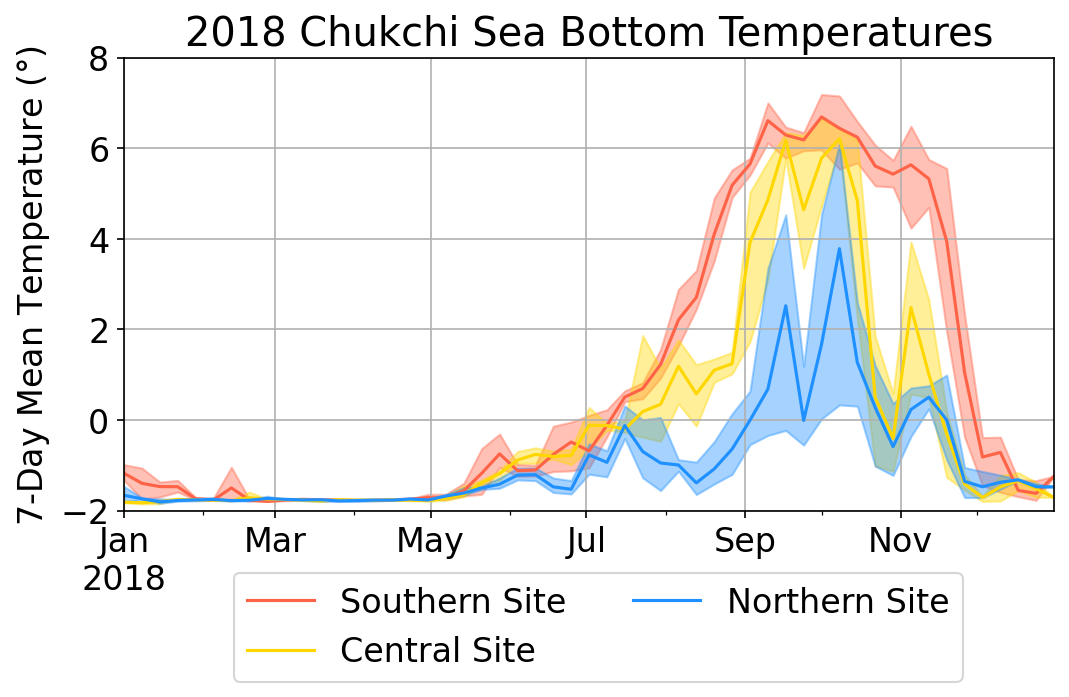

In [24]:
import matplotlib.dates as mdates
plt.figure(figsize=(8,4),dpi=150)
plt.rcParams.update({'font.size':16})
a = daftCTD.resample('1D').mean()
a = a[a.index.year==2018]
plt.plot(a.resample('7D').mean().index,a.resample('7D').mean().Temp_1, color = 'tomato')
plt.plot(a.resample('7D').mean().index,a.resample('7D').mean().Temp_2, color = 'gold')
plt.plot(a.resample('7D').mean().index,a.resample('7D').mean().Temp_3, color = 'dodgerblue')
plt.fill_between(a.resample('7D').mean().index,a.resample('7D').min().Temp_1,a.resample('7D').max().Temp_1, color = 'tomato',alpha=0.4)
plt.fill_between(a.resample('7D').mean().index,a.resample('7D').min().Temp_2,a.resample('7D').max().Temp_2, color = 'gold',alpha=0.4)
plt.fill_between(a.resample('7D').mean().index,a.resample('7D').min().Temp_3,a.resample('7D').max().Temp_3, color = 'dodgerblue',alpha=0.4)
#a.rolling('7D').mean().Temp_2.plot(color= 'gold')
#a.rolling('7D').mean().Temp_3.plot(color = 'dodgerblue')
plt.grid()
#a.rolling('7D').mean().Temp_1.plot()
plt.legend(['Southern Site','Central Site','Northern Site'],bbox_to_anchor=(.1, -.1), loc='upper left',ncol=2)
plt.ylabel('7-Day Mean Temperature ($\degree$)')
plt.title('2018 Chukchi Sea Bottom Temperatures')
plt.axis([pd.to_datetime('2018-01-01'),pd.to_datetime('2018-12-31'),-2,8])

ax = plt.gca()
maj_loc = mdates.MonthLocator(bymonth=np.arange(1,12,2))
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)
zfmts = ['', '%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']
maj_fmt = mdates.ConciseDateFormatter(maj_loc, zero_formats=zfmts, show_offset=False)
ax.xaxis.set_major_formatter(maj_fmt)
#ax.set_xlabel('Date')

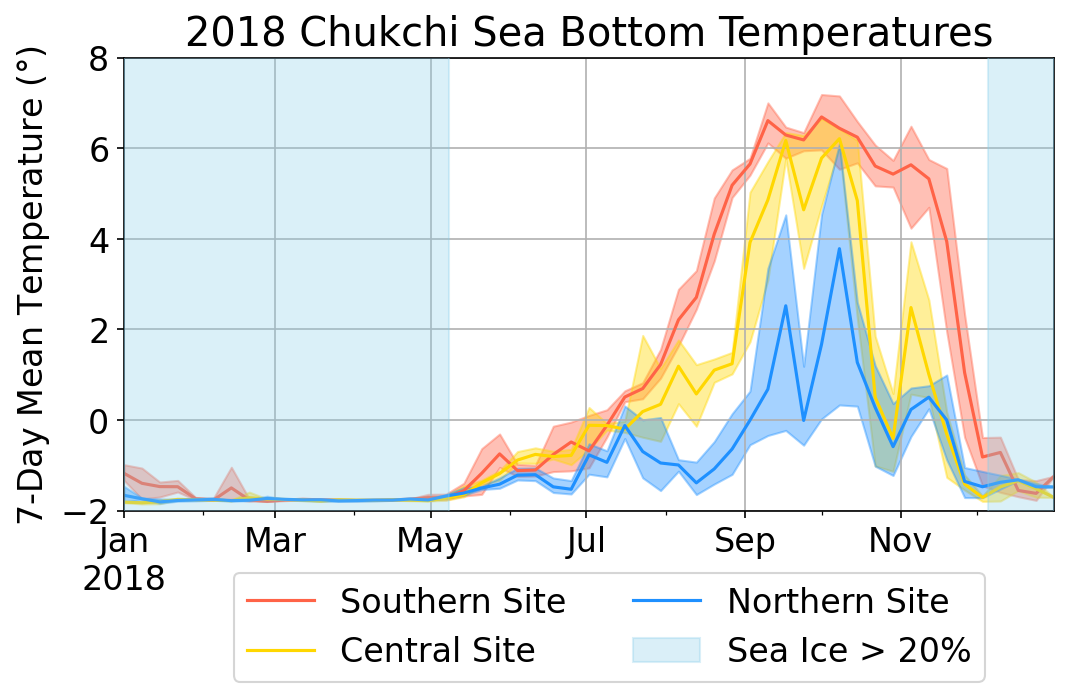

In [22]:
import matplotlib.dates as mdates
plt.figure(figsize=(8,4),dpi=150)
plt.rcParams.update({'font.size':16})
a = daftCTD.resample('1D').mean()
a = a[a.index.year==2018]
plt.plot(a.resample('7D').mean().index,a.resample('7D').mean().Temp_1, color = 'tomato')
plt.plot(a.resample('7D').mean().index,a.resample('7D').mean().Temp_2, color = 'gold')
plt.plot(a.resample('7D').mean().index,a.resample('7D').mean().Temp_3, color = 'dodgerblue')
plt.fill_between(a.resample('7D').mean().index,a.resample('7D').min().Temp_1,a.resample('7D').max().Temp_1, color = 'tomato',alpha=0.4)
plt.fill_between(a.resample('7D').mean().index,a.resample('7D').min().Temp_2,a.resample('7D').max().Temp_2, color = 'gold',alpha=0.4)
plt.fill_between(a.resample('7D').mean().index,a.resample('7D').min().Temp_3,a.resample('7D').max().Temp_3, color = 'dodgerblue',alpha=0.4)
#a.rolling('7D').mean().Temp_2.plot(color= 'gold')
#a.rolling('7D').mean().Temp_3.plot(color = 'dodgerblue')
plt.grid()
#a.rolling('7D').mean().Temp_1.plot()

plt.ylabel('7-Day Mean Temperature ($\degree$)')
plt.title('2018 Chukchi Sea Bottom Temperatures')
plt.axis([pd.to_datetime('2018-01-01'),pd.to_datetime('2018-12-31'),-2,8])

ax = plt.gca()
ax.axvspan(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-05-08'), ymin=-25, ymax=15, alpha=0.3, color='skyblue',zorder=3)
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.legend(['Southern Site','Central Site','Northern Site','Sea Ice > 20%'],bbox_to_anchor=(.1, -.1), loc='upper left',ncol=2)
ax.axvspan(pd.to_datetime('2018-12-05'), pd.to_datetime('2018-12-31'), ymin=-25, ymax=15, alpha=0.3, color='skyblue',zorder=3)
maj_loc = mdates.MonthLocator(bymonth=np.arange(1,12,2))
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)
zfmts = ['', '%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']
maj_fmt = mdates.ConciseDateFormatter(maj_loc, zero_formats=zfmts, show_offset=False)
ax.xaxis.set_major_formatter(maj_fmt)
#ax.set_xlabel('Date')

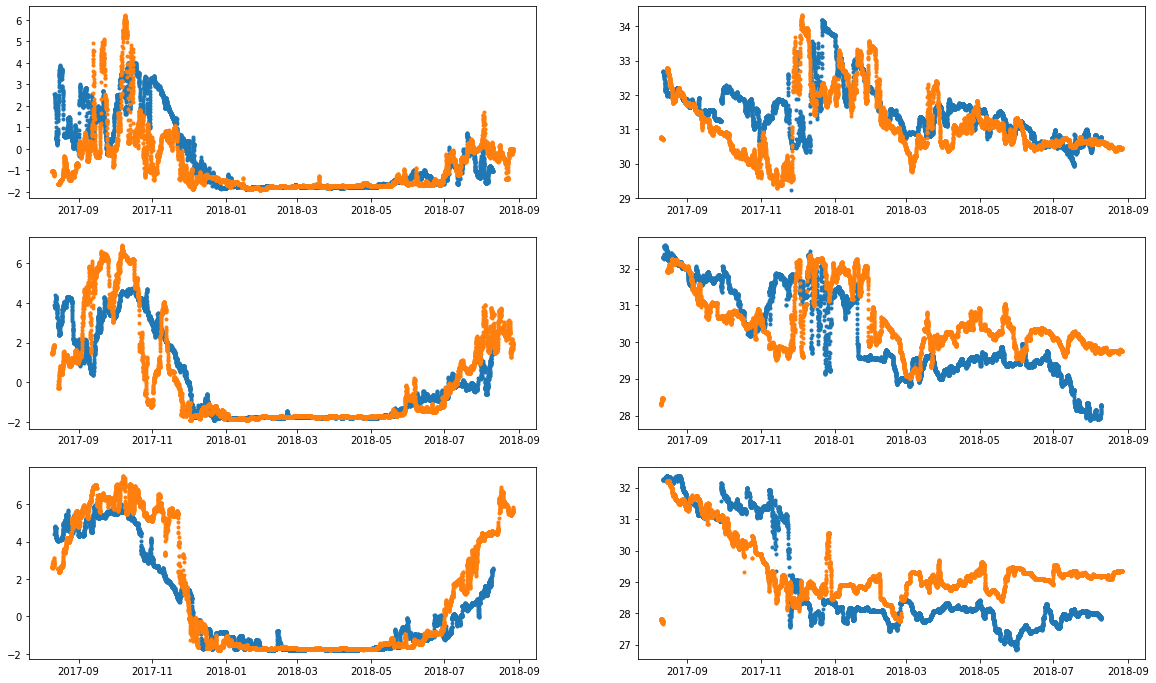

In [7]:
import datetime
fig = plt.figure(figsize=(20,12))
plt.subplot(321)
plt.plot(daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].index, daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].Temp_3,'.')
plt.plot(daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].index-datetime.timedelta(365), daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].Temp_3,'.')
plt.subplot(323)
plt.plot(daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].index, daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].Temp_2,'.')
plt.plot(daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].index-datetime.timedelta(365), daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].Temp_2,'.')
plt.subplot(325)
plt.plot(daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].index, daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].Temp_1,'.')
plt.plot(daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].index-datetime.timedelta(365), daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].Temp_1,'.')

plt.subplot(322)
plt.plot(daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].index, daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].Sal_3,'.')
plt.plot(daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].index-datetime.timedelta(365), daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].Sal_3,'.')
plt.subplot(324)
plt.plot(daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].index, daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].Sal_2,'.')
plt.plot(daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].index-datetime.timedelta(365), daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].Sal_2,'.')
plt.subplot(326)
plt.plot(daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].index, daftCTD[daftCTD.index < pd.to_datetime('2018-08-10')].Sal_1,'.')
plt.plot(daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].index-datetime.timedelta(365), daftCTD[daftCTD.index > pd.to_datetime('2018-08-10')].Sal_1,'.')
#datetime.timedelta('1Y')

# Combine 2 years of compass

In [3]:
def readCompassPMEL(files, mooring, start):
    dir = []
    temp = []
    time = []
    for file in files:
        try:
            dfCompass=pd.read_csv(file, header = None)
            for dat in dfCompass[1]:
                dir.append(float(dat.split('P')[0][2:]))
                temp.append(float(dat.split('-')[-1][:-3]))
            for t in dfCompass[0]:
                time.append(t)
        except:
            continue
    corrTime = [start+(x- pd.to_datetime(time[5])) for x in  pd.to_datetime(time[5:min(len(time), len(dir))])]
    df = pd.DataFrame({'Datetime':corrTime,'Dir_'+str(mooring):dir[5:min(len(time), len(dir))]})
    df = df.set_index('Datetime')
    return df
    return time, dir

def readCompassAaronia(file, mooring):
    df = pd.read_csv(file)
    df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time(local time)'])
    df = df[['Datetime','compass (deg)']]
    df = df.rename(columns={'compass (deg)':'Dir_'+str(mooring)})
    df = df.set_index('Datetime')
    return df

def readCompassOpenTag(files, mooring):
    dfs = []
    for file in files:
        df = pd.read_csv(file)
        dfs.append(df)
        dfA = pd.concat(dfs)
    dfA = dfA.reset_index()
    return dfA

dfD1Y1C1 = readCompassPMEL(glob('../data/2018/DAFT1/Compass/PMEL/SERIAL/*.txt'), 1, datetime.datetime(2017,8,6,17,0,0))
dfD1Y1C2 = readCompassOpenTag(glob('../data/2018/DAFT1/Compass/OpenTag/*.csv'), 1)
dfD2Y1C1 = readCompassPMEL(glob('../data/2018/DAFT2/Compass/PMEL/SERIAL/*.txt'), 2, datetime.datetime(2017,8,8,6,40,0))
dfD1Y2C1 = readCompassAaronia('../data/2019//DAFT1/Compass/Aaronia/DSFT1Converted_Formatted.csv',1)
dfD2Y2C1 = readCompassPMEL(glob('../data/2019//DAFT2/Compass/PMEL/SERIAL/*.txt'), 2, datetime.datetime(2018,8,12,16,20,0))
dfD3Y2C1 = readCompassPMEL(glob('../data/2019//DAFT3/Compass/PMEL/SERIAL/*.txt'), 3, datetime.datetime(2018,8,14,19,30,0))

In [3]:
for df in [dfD1Y1C1,dfD2Y1C1,dfD1Y2C1[dfD1Y2C1.index >pd.to_datetime('2018-08-11 15:40')],dfD2Y2C1[(dfD2Y2C1.index >pd.to_datetime('2018-08-14'))&(dfD2Y2C1.index <pd.to_datetime('2019-08-30'))],dfD3Y2C1]:
    print(df.index.max()-df.index.min())

368 days 22:00:09
296 days 19:00:00
0 days 04:35:43
380 days 23:00:09
334 days 04:00:00


Dir_1    4.614027
dtype: float64
Dir_2    5.492784
dtype: float64
Dir_1    1.341153
dtype: float64


<ipython-input-10-e063799136c4>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(2,3,ct)


Dir_2    9.320166
dtype: float64
Dir_3    9.026013
dtype: float64


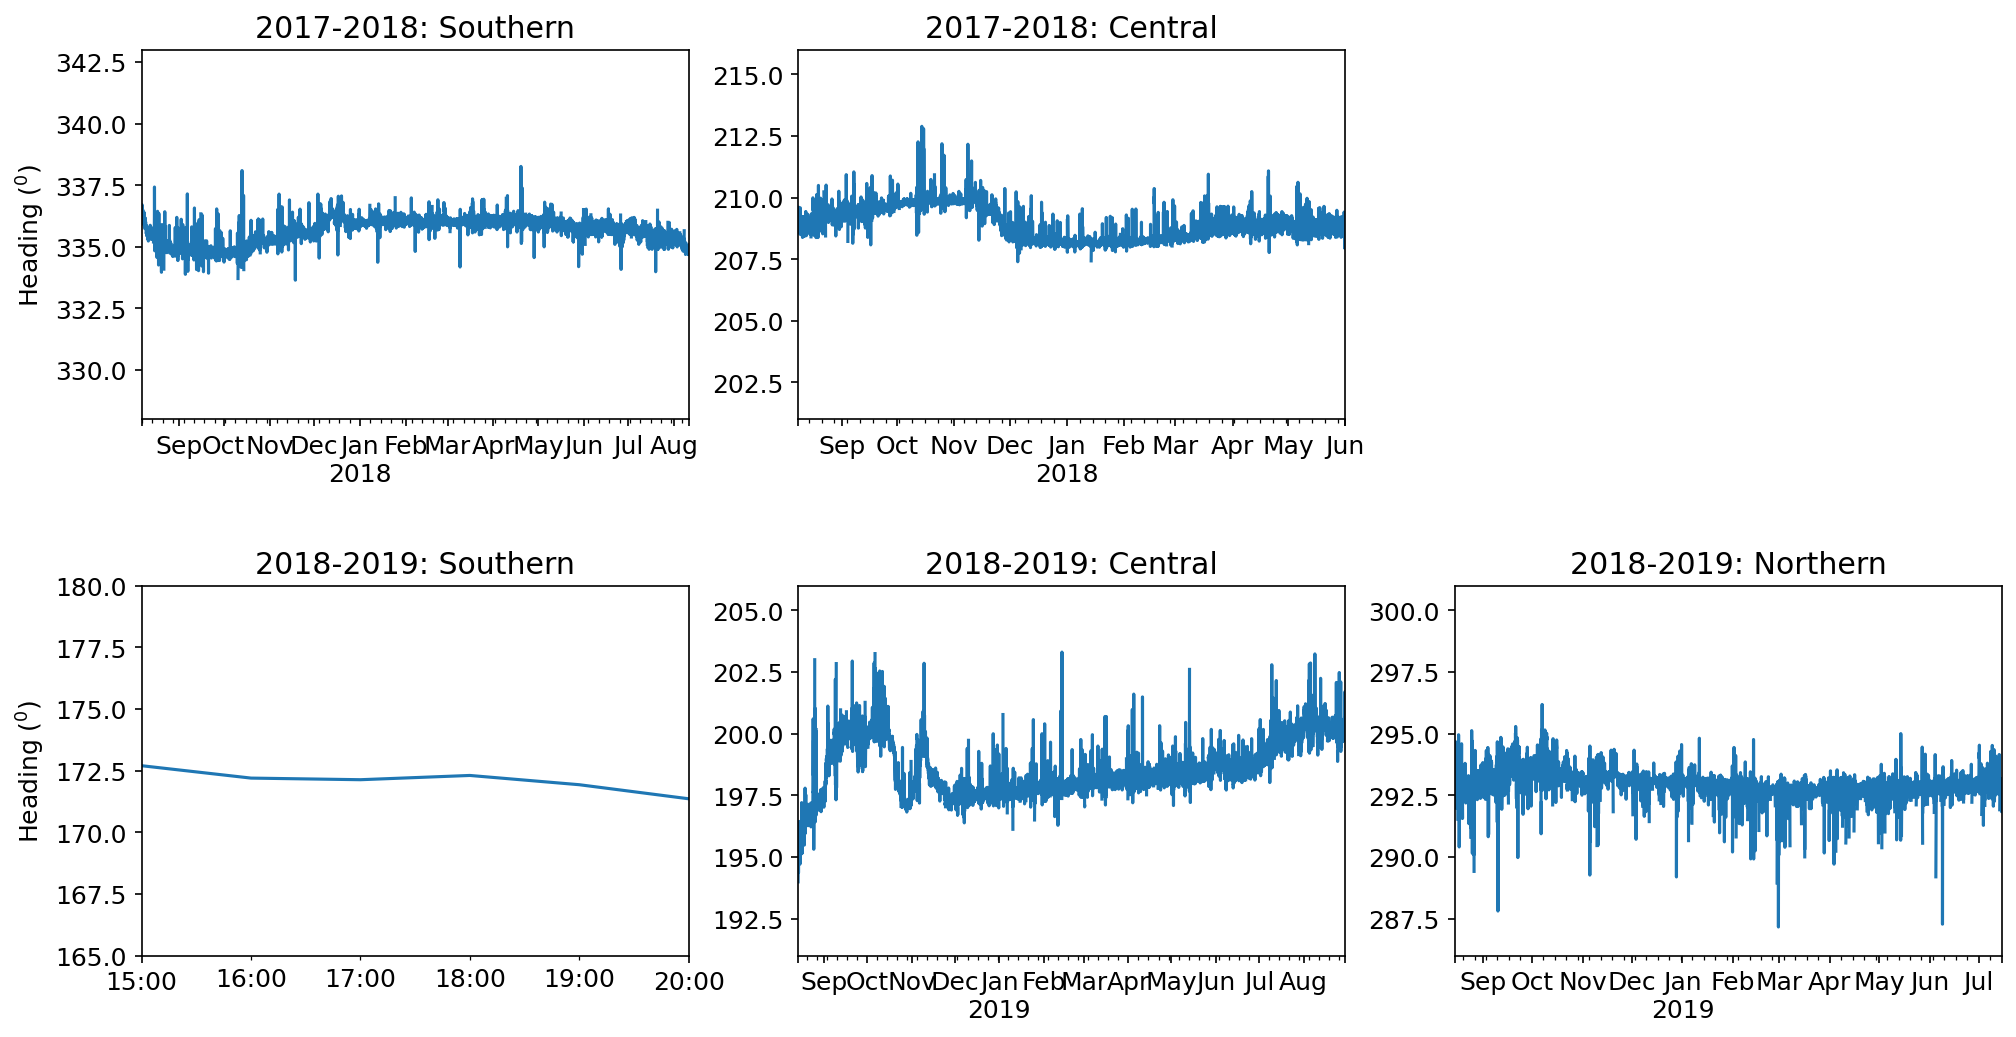

In [10]:
def fmtAxis(ax):
    maj_loc = mdates.MonthLocator(bymonth=np.arange(1,12,1))
    ax.xaxis.set_major_locator(maj_loc)
    min_loc = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(min_loc)
    zfmts = ['', '%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']
    maj_fmt = mdates.ConciseDateFormatter(maj_loc, zero_formats=zfmts, show_offset=False)
    ax.xaxis.set_major_formatter(maj_fmt)
    
fig = plt.figure(figsize=(16,8),dpi=150)

title = ['2017-2018: Southern','2017-2018: Central','pass','2018-2019: Southern','2018-2019: Central','2018-2019: Northern']
ylabel=['Heading ($^{0}$)','','','Heading ($^{0}$)','','']
ct = 1
plt.rcParams.update({'font.size':12})
for df in [dfD1Y1C1,dfD2Y1C1,1,dfD1Y2C1[dfD1Y2C1.index >pd.to_datetime('2018-08-11 15:40')],dfD2Y2C1[(dfD2Y2C1.index >pd.to_datetime('2018-08-14'))&(dfD2Y2C1.index <pd.to_datetime('2019-08-30'))],dfD3Y2C1]:
    try:
        ax = plt.subplot(2,3,ct)
        if ct==4:
                df.resample('1H').mean().plot(ax=ax,label='compass',legend=False)
        else:
            df.resample('1H').mean().plot(ax=ax,label='compass',legend=False)
        ax.set_title(title[ct-1])
        ax.set_ylabel(ylabel[ct-1])
        ax.set_ylim([round(df.resample('1H').mean().mean()[0]-7.5),round(df.resample('1H').mean().mean()[0]+7.5)])
        ax.set_xlabel('')
        print(df.resample('1H').mean().max()-df.resample('1H').mean().min())
    except:
        ax = plt.subplot(2,3,ct)
        ax.set_axis_off()
    ct+=1
    
    

plt.subplots_adjust(hspace=0.45)
    

In [6]:
df.resample('1H').mean().mean()[0]

293.01840930469973

In [58]:
for df in [dfD1Y1C1,dfD2Y1C1,dfD1Y2C1[dfD1Y2C1.index >pd.to_datetime('2018-08-11 15:40')],dfD2Y2C1[(dfD2Y2C1.index >pd.to_datetime('2018-08-14'))&(dfD2Y2C1.index <pd.to_datetime('2019-08-30'))],dfD3Y2C1]:
    print('mode: ',df.resample('1H').mean().mean())

mode:  Dir_1    335.659011
dtype: float64
mode:  Dir_2    208.924522
dtype: float64
mode:  Dir_1    172.106843
dtype: float64
mode:  Dir_2    198.512584
dtype: float64
mode:  Dir_3    293.018409
dtype: float64


Dir_1    4.614027
dtype: float64
Dir_2    5.492784
dtype: float64
Dir_1    1.341153
dtype: float64


<ipython-input-14-55ca3b5e5d01>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(2,3,ct)


Dir_2    9.320166
dtype: float64
Dir_3    9.026013
dtype: float64


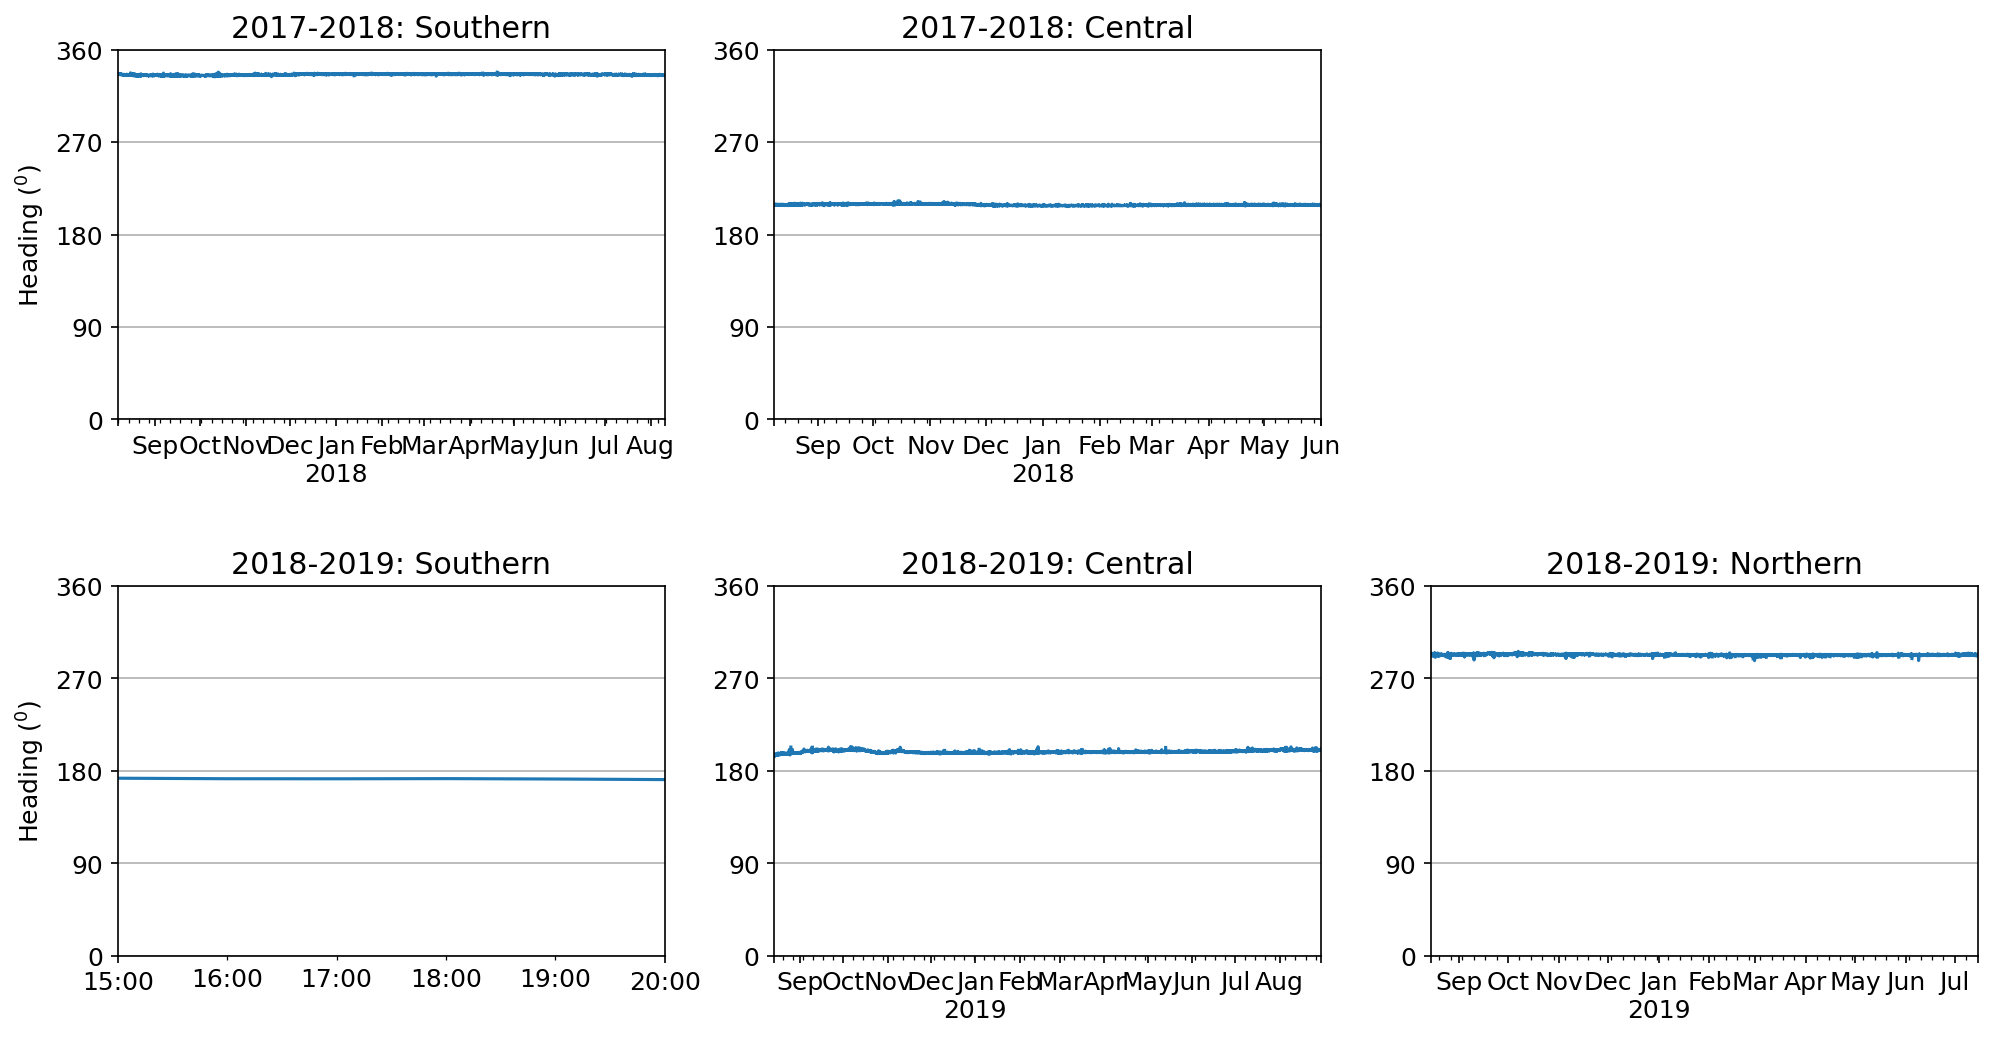

In [14]:
def fmtAxis(ax):
    maj_loc = mdates.MonthLocator(bymonth=np.arange(1,12,1))
    ax.xaxis.set_major_locator(maj_loc)
    min_loc = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(min_loc)
    zfmts = ['', '%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']
    maj_fmt = mdates.ConciseDateFormatter(maj_loc, zero_formats=zfmts, show_offset=False)
    ax.xaxis.set_major_formatter(maj_fmt)
    
fig = plt.figure(figsize=(16,8),dpi=150)

title = ['2017-2018: Southern','2017-2018: Central','pass','2018-2019: Southern','2018-2019: Central','2018-2019: Northern']
ylabel=['Heading ($^{0}$)','','','Heading ($^{0}$)','','']
ct = 1
plt.rcParams.update({'font.size':12})
for df in [dfD1Y1C1,dfD2Y1C1,1,dfD1Y2C1[dfD1Y2C1.index >pd.to_datetime('2018-08-11 15:40')],dfD2Y2C1[(dfD2Y2C1.index >pd.to_datetime('2018-08-14'))&(dfD2Y2C1.index <pd.to_datetime('2019-08-30'))],dfD3Y2C1]:
    try:
        ax = plt.subplot(2,3,ct)
        if ct==4:
                df.resample('1H').mean().plot(ax=ax,label='compass',legend=False)
        else:
            df.resample('1H').mean().plot(ax=ax,label='compass',legend=False)
        ax.set_title(title[ct-1])
        ax.set_ylabel(ylabel[ct-1])
        ax.set_ylim([0, 360])
        ax.set_yticks([0, 90,180,270,360])
        ax.set_xlabel('')
        print(df.resample('1H').mean().max()-df.resample('1H').mean().min())
    except:
        ax = plt.subplot(2,3,ct)
        ax.set_axis_off()
    ax.grid(axis='y')
    ct+=1
        
    
    

plt.subplots_adjust(hspace=0.45)
    

In [ ]:
def readCompassOpenTag(glob('../data/2018/DAFT1/Compass/OpenTag/*.csv'), 1):
    df = pd.read_csv(file)
    df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time(local time)'])
    df = df[['Datetime','compass (deg)']]
    df = df.rename(columns={'compass (deg)':'Dir_'+str(mooring)})
    df = df.set_index('Datetime')
    return df

In [2]:
from glob import glob
a = glob('../data/2018/DAFT1/Compass/OpenTag/*.csv')
a[0]

'../data/2018/DAFT1/Compass/OpenTag\\170806T003231_c3920f16504b3239302e3120ff020a3b.csv'

In [104]:
def readCompassOpenTag(files, mooring):
    dfs = []
    for file in files:
        try:
            df = pd.read_csv(file)
            dfs.append(df)
            dfA = pd.concat(dfs)
        except:
            continue
    dfA = dfA.reset_index()
    return dfA

In [110]:
dfA = readCompassOpenTag(glob('../data/2018/DAFT2/Compass/OpenTag/*.csv')[-500:], 1)

<AxesSubplot:>

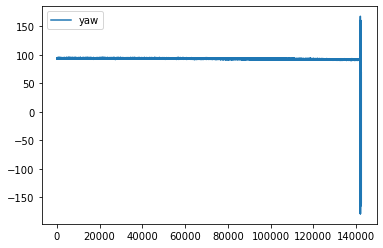

In [111]:
dfA.plot(y='yaw')

In [112]:
dfA.yaw.mode()

0    93.62
dtype: float64